# Performance-Based Ranking

In this example, you will get familiarized with the ranking of entities (assimilated to two-class classifiers), based on their performances (normalized confusion matrices) and a score. Not all scores are suitable to rank, but all ranking scores do. If you want to use a score that does not belong to this family, first be sure that the performance ordering induced by it satisfies all the axioms of performance-based ranking (see Piérard et al., 2025).

In [8]:
from sorbetto.core.entity import Entity
from sorbetto.performance.two_class_classification_performance import TwoClassClassificationPerformance
from sorbetto.ranking.ranking_induced_by_score import RankingInducedByScore
from sorbetto.ranking.ranking_score import RankingScore

import matplotlib.pyplot as plt

## Define the entities to rank and their performances

In [9]:
ca = Entity( TwoClassClassificationPerformance(0.4, 0.1, 0.2, 0.3), 'Classifier "A"' )
cb = Entity( TwoClassClassificationPerformance(0.3, 0.2, 0.15, 0.35), 'Classifier "B"' )
cc = Entity( TwoClassClassificationPerformance(0.2, 0.3, 0.1, 0.4), 'Classifier "C"' )
cd = Entity( TwoClassClassificationPerformance(0.45, 0.05, 0.1, 0.4), 'Classifier "D"' )
ce = Entity( TwoClassClassificationPerformance(0.1, 0.4, 0.45, 0.05), 'Classifier "E"' )

entities = [ ca, cb, cc, cd, ce ]

## Choose the score to use to establish the ranking

In [10]:
score = RankingScore.getF ( beta=1.0 )

## Sorbetto is all you need to compute a ranking

In [11]:
ranking = RankingInducedByScore ( entities, score )

Let us print the ranking. Rank $1$ corresponds to the best entities, and the last rank to the worst entities, according to the chosen score.

In [12]:
for rank in range ( 1, 1+len ( entities ) ) :
    entities_at_rank_r = ranking.getEntitiesAtRank ( rank )
    names = [ e.name for e in entities_at_rank_r ]
    print ( 'Entities at rank', rank, ':', names )

Entities at rank 1 : ['Classifier "D"']
Entities at rank 2 : ['Classifier "B"']
Entities at rank 3 : ['Classifier "A"', 'Classifier "C"']
Entities at rank 4 : ['Classifier "A"', 'Classifier "C"']
Entities at rank 5 : ['Classifier "E"']


We can also obtain the ranks for each entity.

In [13]:
for entity in entities :
    min_rank = ranking.getMinRank ( entity )
    max_rank = ranking.getMaxRank ( entity )
    if min_rank == max_rank :
        print ( 'The entity', entity.name, 'is at rank', min_rank )
    else :
        print ( 'The entity', entity.name, 'and the equivalent ones are at ranks between', min_rank, 'and', max_rank )

The entity Classifier "A" is at rank 5
The entity Classifier "B" and the equivalent ones are at ranks between 3 and 4
The entity Classifier "C" and the equivalent ones are at ranks between 3 and 4
The entity Classifier "D" is at rank 2
The entity Classifier "E" is at rank 1


## Draw the ranking

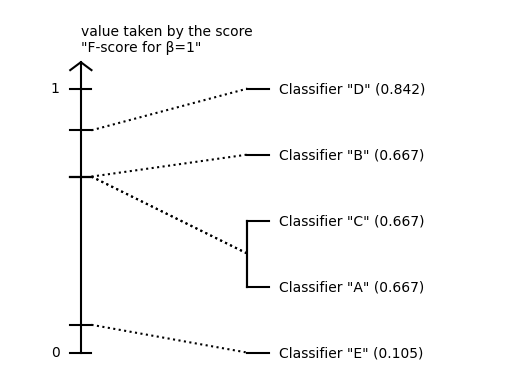

In [14]:
fig, ax = plt.subplots ()
ranking.draw ( fig, ax )
plt.show ()